## Import

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [19]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [20]:
physical_model = "PARSEC"
path_to_data = "../../../../../../data/PARSEC/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold/"
tag = "Base"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading PARSEC dataframe from csv file...


,logAge,logTe,logg,label,metallicity,Mass,Rpol
0,5.00000,3.4744,2.965,0.0,-0.25,0.090,1.636
1,5.00000,3.4752,2.963,0.0,-0.25,0.092,1.656
2,5.00000,3.4780,2.956,0.0,-0.25,0.098,1.725
3,5.00000,3.4789,2.954,0.0,-0.25,0.100,1.747
4,5.00000,3.4819,2.950,0.0,-0.25,0.106,1.811
...,...,...,...,...,...,...,...
681298,10.25002,3.4812,0.032,7.0,0.50,0.801,143.400
681299,10.25002,3.4776,-0.004,7.0,0.50,0.801,149.900
681300,10.25002,3.4742,-0.038,7.0,0.50,0.800,156.500
681301,10.25002,3.4701,-0.077,7.0,0.50,0.800,164.400


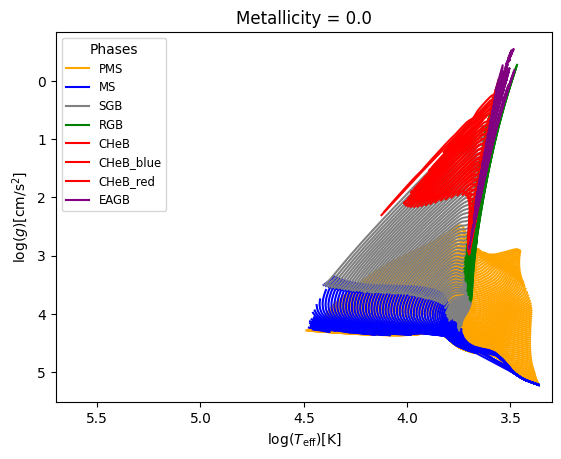

In [21]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['logAge', 'logTe', 'logg', 'label', 'metallicity', 'Mass', 'Rpol'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

,logAge,logTe,logg,label,metallicity,Mass,Rpol
0,5.60000,4.4269,4.356,1.0,-0.25,9.714,3.428
1,5.65000,4.4266,4.355,1.0,-0.25,9.714,3.434
2,5.70000,4.4263,4.353,1.0,-0.25,9.714,3.440
3,5.75000,4.4061,4.358,1.0,-0.25,8.856,3.268
4,5.75000,4.4260,4.352,1.0,-0.25,9.714,3.447
...,...,...,...,...,...,...,...
499615,10.25002,3.4812,0.032,7.0,0.50,0.801,143.400
499616,10.25002,3.4776,-0.004,7.0,0.50,0.801,149.900
499617,10.25002,3.4742,-0.038,7.0,0.50,0.800,156.500
499618,10.25002,3.4701,-0.077,7.0,0.50,0.800,164.400


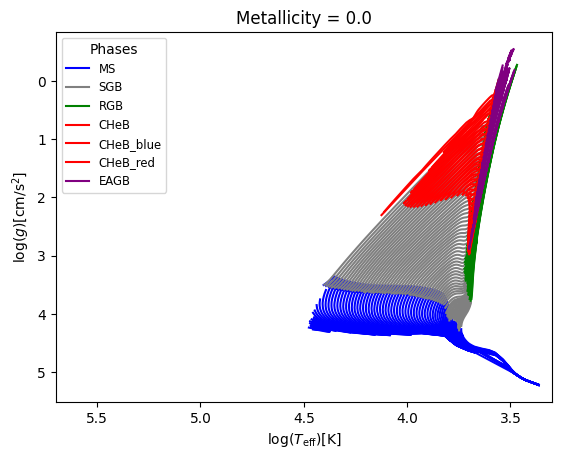

In [22]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'label':[1, 2, 3, 4, 5, 6, 7, 8]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [23]:
print_all_uniques(phase_filtered_iso_df)

logAge  : Range : 5.3 - 10.25, Mean : 9.1668, Median : 9.4

logTe  : Range : 3.36 - 4.5177, Mean : 3.7418, Median : 3.7133

logg  : Range : -0.66 - 5.345, Mean : 2.4609, Median : 2.429

Values in label column : 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.25, -2.5, -2.75, 0.0, 0.25, 0.5 

Mass  : Range : 0.09 - 13.952, Mean : 2.3888, Median : 1.345

Rpol  : Range : 0.11 - 939.1, Mean : 36.9259, Median : 11.08



In [24]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_filtered_iso_df, x_cols=['logAge', 'logTe', 'logg', 'metallicity'], 
                               y_cols=['Mass', 'Rpol'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.09 - 13.952
Median value in train data for the mass parameter: 1.348
Mean value in train data for the mass parameter: 2.392733274622046
Range in train data for the radius parameter : 0.1056 - 939.1
Median value in train data for the radius parameter: 11.08
Mean value in train data for the radius parameter: 37.02370043366292

Testing set statistics:
Range in test data for the mass parameter : 0.09 - 13.926
Median value in test data for the mass parameter: 1.34
Mean value in test data for the mass parameter: 2.3770972178855927
Range in test data for the radius parameter : 0.1056 - 917.4
Median value in test data for the radius parameter: 11.07
Mean value in test data for the radius parameter: 36.632687900404306

(374715, 4) (124905, 4)
(374715, 2) (124905, 2)


## Model training

### Linear regression

In [9]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


Base train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.8254984891537506
RMSE :  1.0908905988960746
MAE :  0.755771585520284
MedAE :  0.5517083378720986
CORR :  0.9085694740386919
MAX_ER :  5.929750039194652
Percentiles : 
  75th percentile :  0.8951225858548754
  90th percentile :  1.608228389003139
  95th percentile :  2.304055624099097
  99th percentile :  4.2843636119939355



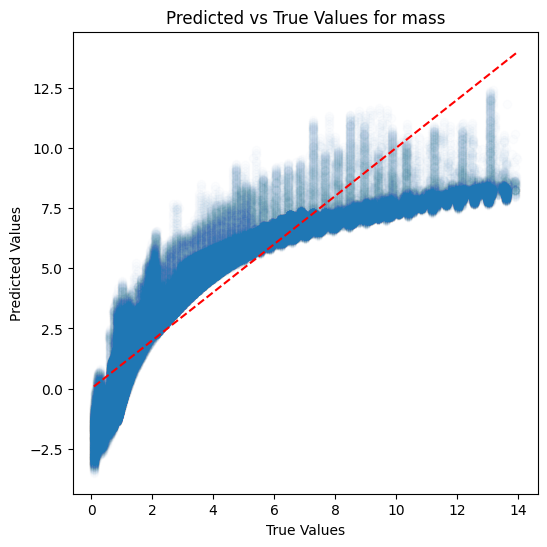

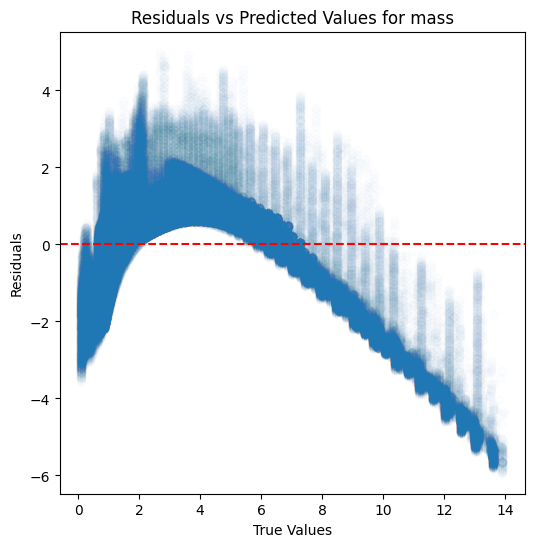

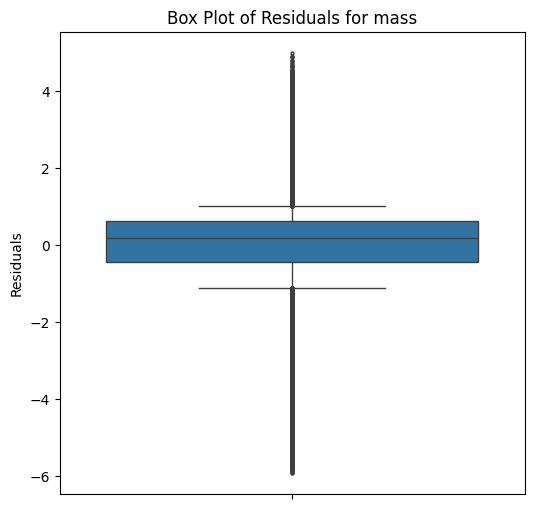

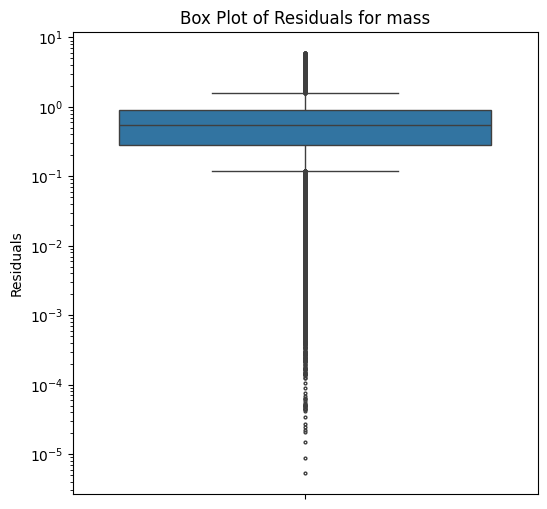

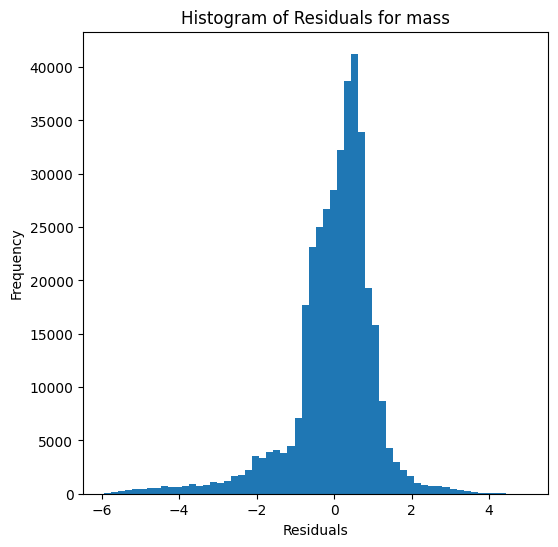

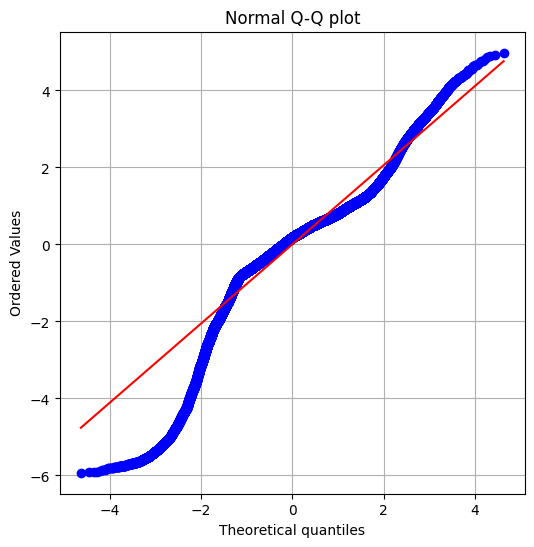


radius results:
RVE :  0.6267741952960548
RMSE :  50.053921808688855
MAE :  32.01086661528698
MedAE :  23.461350712129104
CORR :  0.7916907194744529
MAX_ER :  670.1112762523534
Percentiles : 
  75th percentile :  39.84178318749272
  90th percentile :  65.25980753843851
  95th percentile :  79.11994196225045
  99th percentile :  187.39505073588035



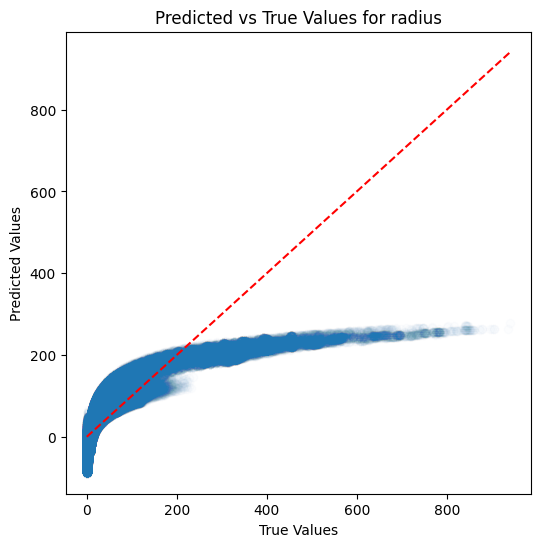

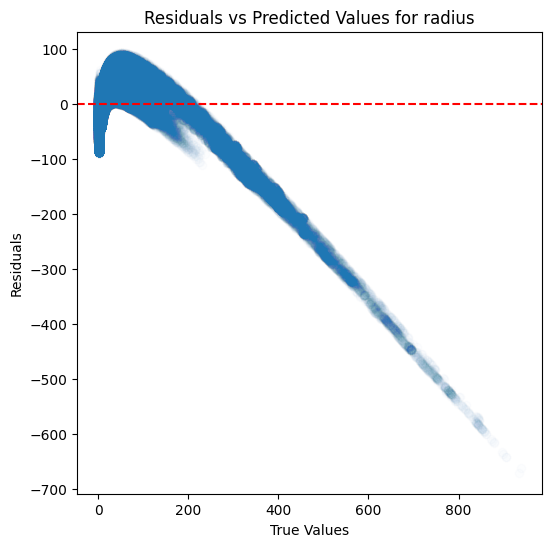

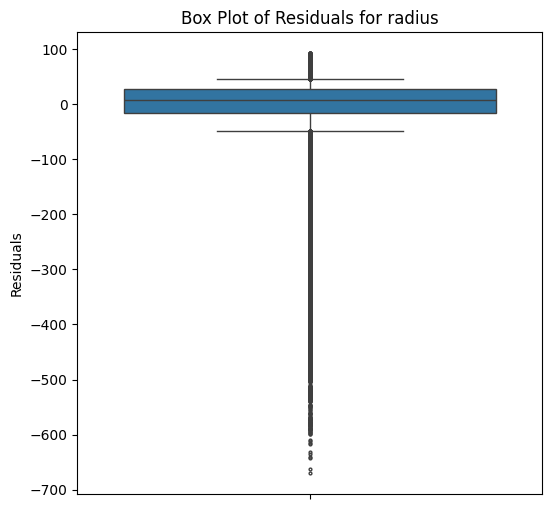

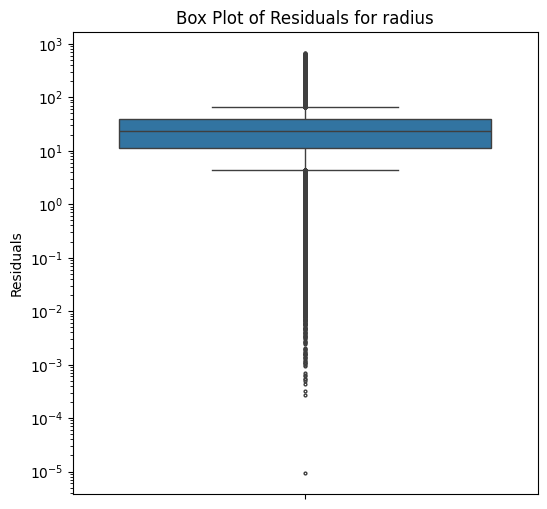

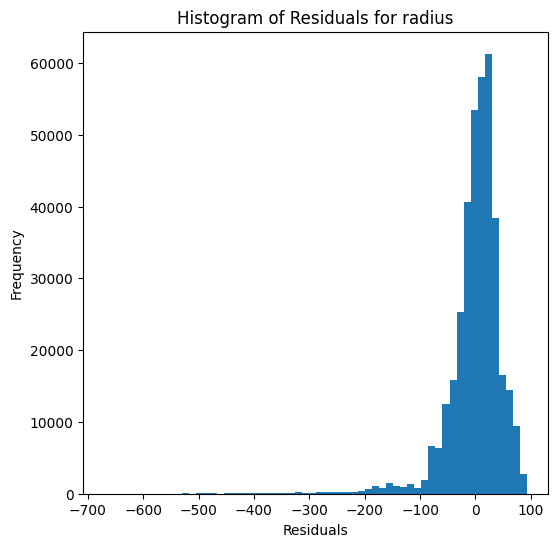

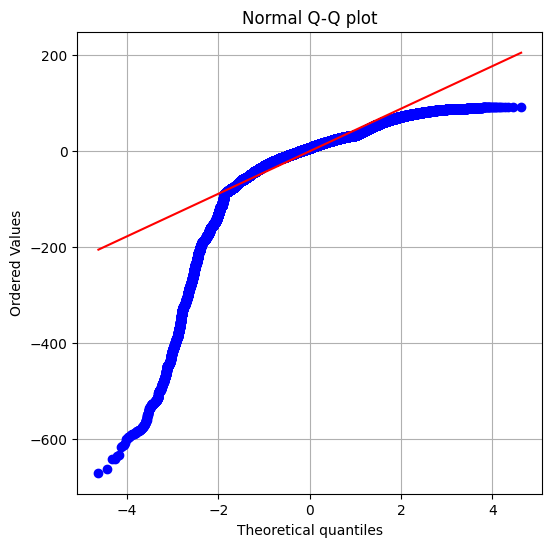

In [10]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [27]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


Base train data :
split 1 2 3 4 5 6 7 8 9 10 374715
0.0
3.616999999999999


c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



mass results:
RVE :  0.9991950648126066
RMSE :  0.07409500474503916
MAE :  0.014739065692255174
MedAE :  0.0
CORR :  0.999597458460088
MAX_ER :  3.616999999999999
Percentiles : 
  75th percentile :  4.440892098500626e-16
  90th percentile :  0.026999999999999913
  95th percentile :  0.08000000000000007
  99th percentile :  0.29499999999999993



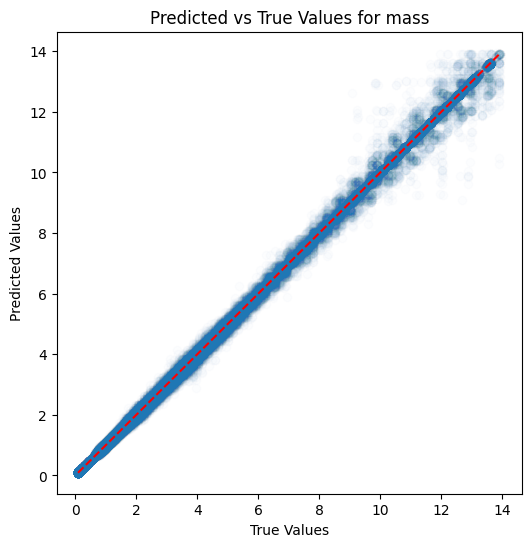

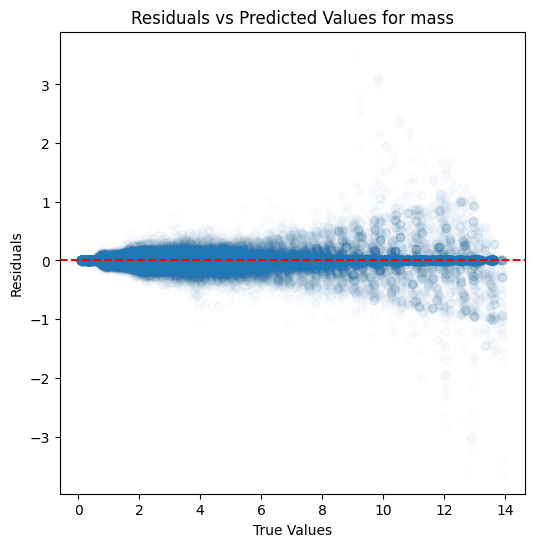

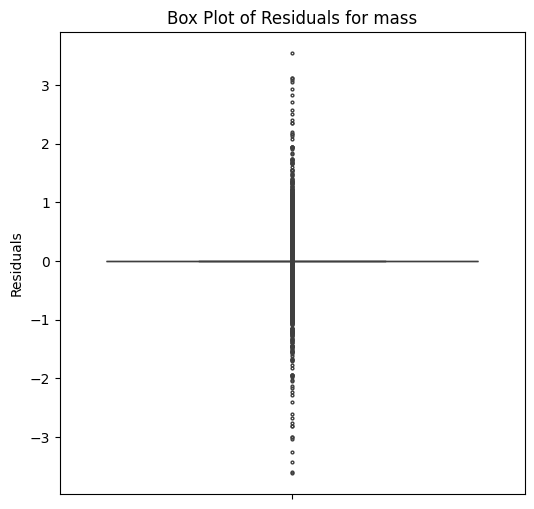

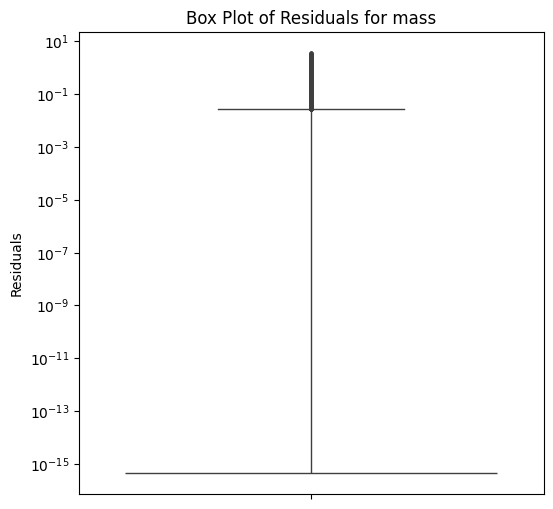

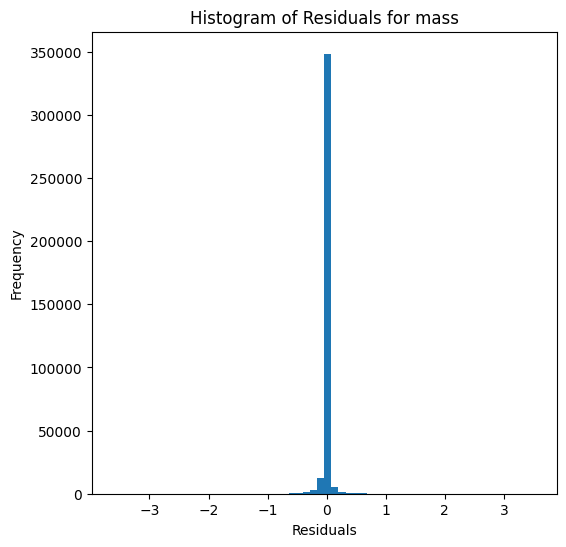

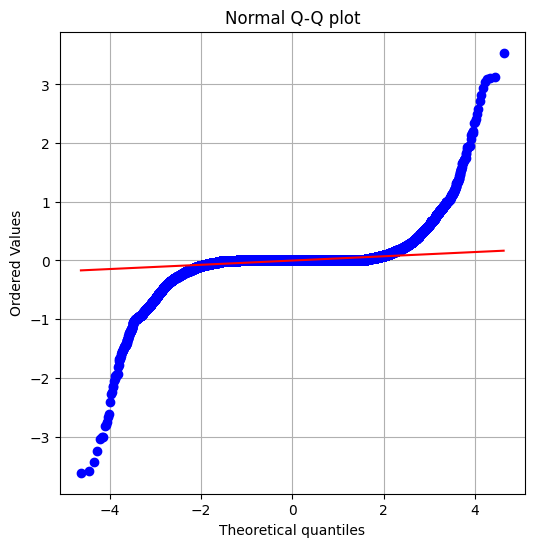

374715
0.0
101.19999999999999


c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



radius results:
RVE :  0.9996128612182594
RMSE :  1.6120861648297204
MAE :  0.23144775133558632
MedAE :  5.684341886080802e-14
CORR :  0.999806443328348
MAX_ER :  101.19999999999999
Percentiles : 
  75th percentile :  0.009999999999999787
  90th percentile :  0.1899999999999995
  95th percentile :  0.8000000000000114
  99th percentile :  5.0



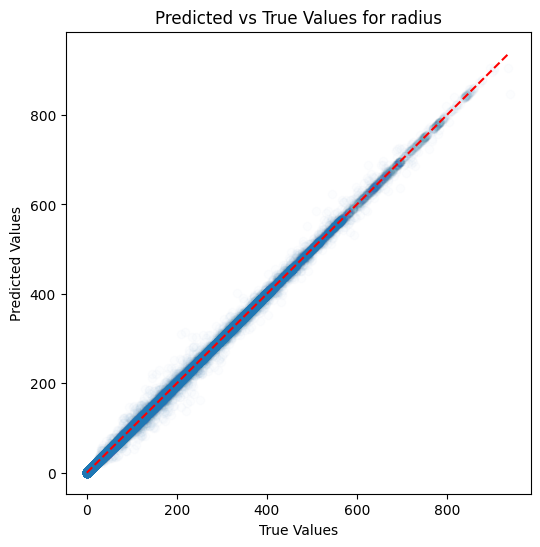

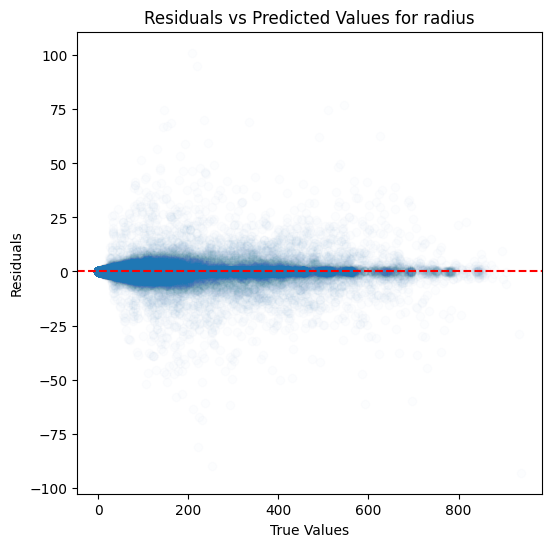

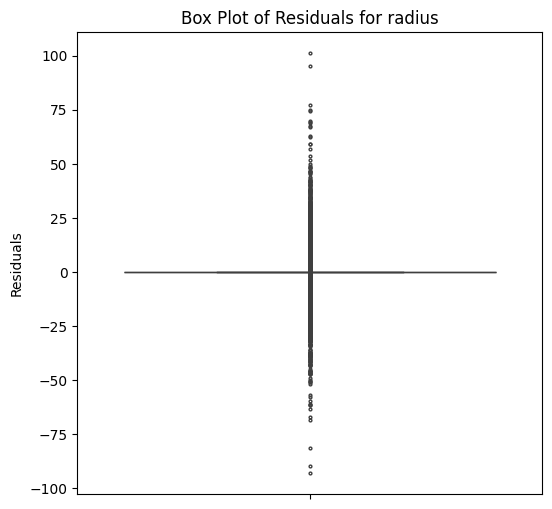

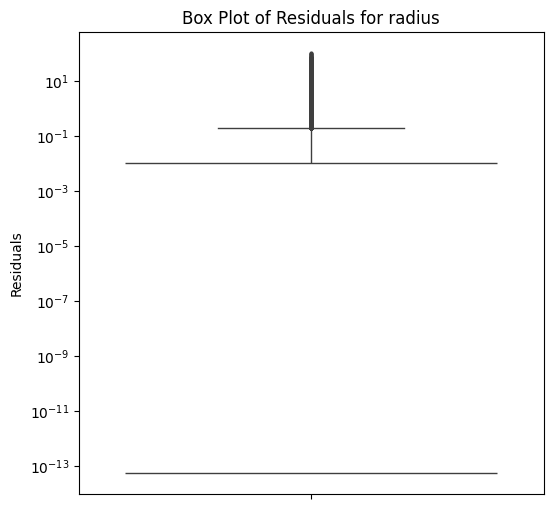

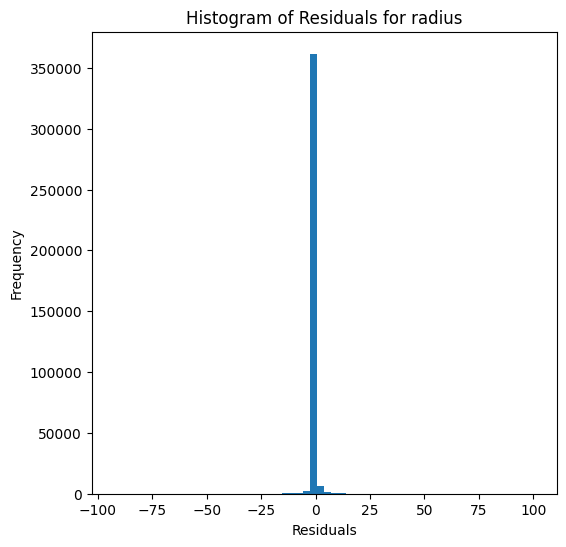

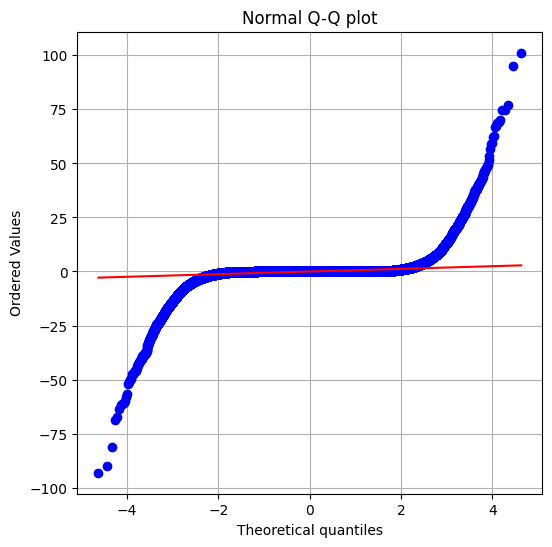

In [28]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=13, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [13]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


Base train data :
split 1 2 3 4 5 6 7 8 9 10 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



mass results:
RVE :  0.9990308063544262
RMSE :  0.08130143768395573
MAE :  0.023311930400437674
MedAE :  0.000400000000000178
CORR :  0.9995177203920431
MAX_ER :  4.6693999999999996
Percentiles : 
  75th percentile :  0.014199999999999768
  90th percentile :  0.06300000000000006
  95th percentile :  0.11359999999999992
  99th percentile :  0.3349999999999991



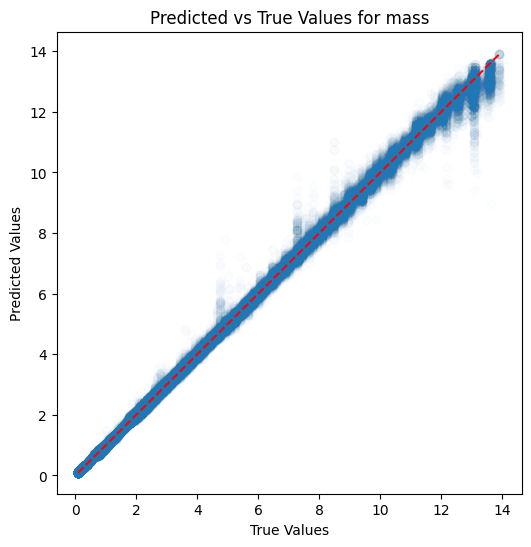

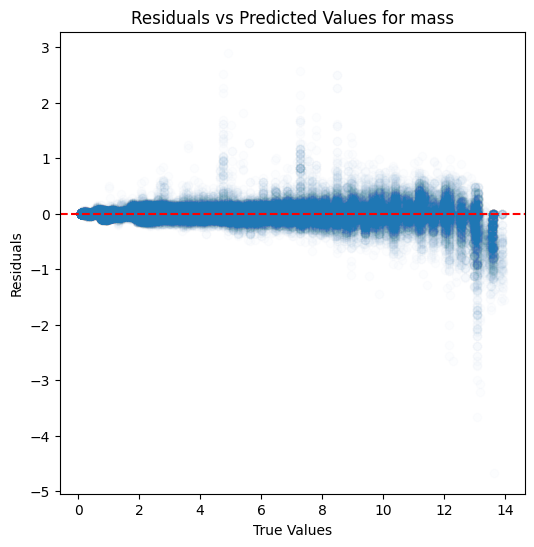

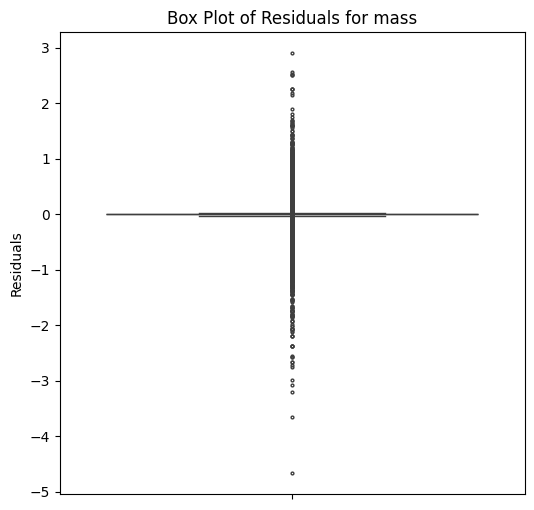

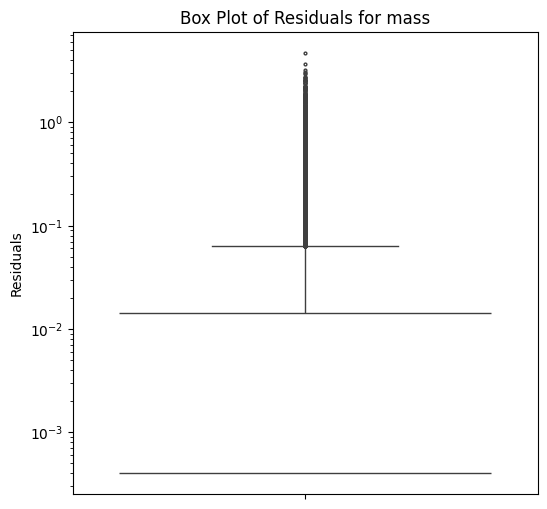

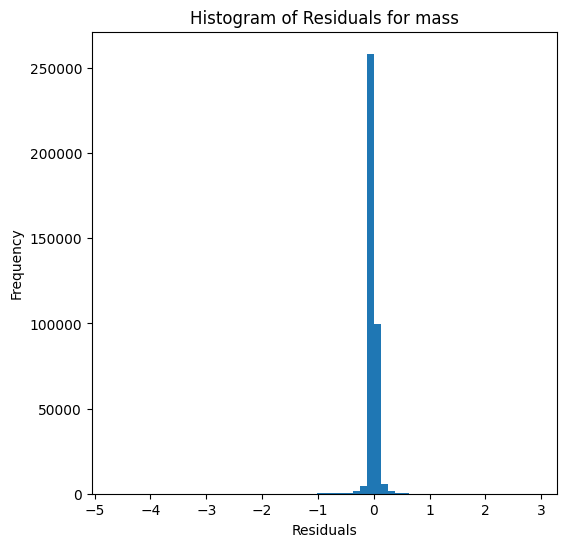

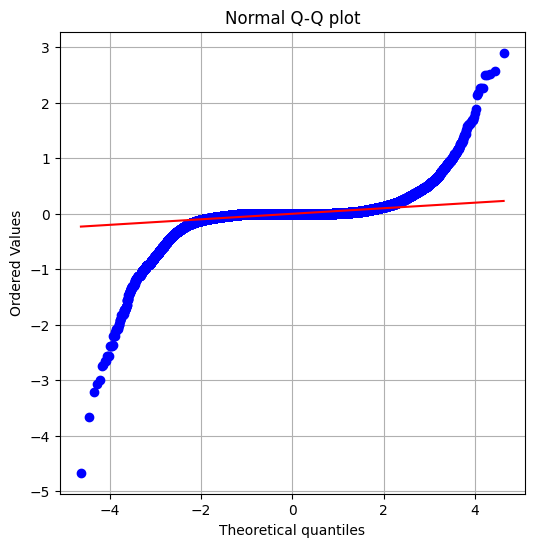


radius results:
RVE :  0.9995866396430312
RMSE :  1.6659341969381045
MAE :  0.36549696697490097
MedAE :  0.012000000000000455
CORR :  0.9997933574541549
MAX_ER :  104.22000000000014
Percentiles : 
  75th percentile :  0.10400000000000276
  90th percentile :  0.7079999999999984
  95th percentile :  1.617999999999995
  99th percentile :  6.699999999999989



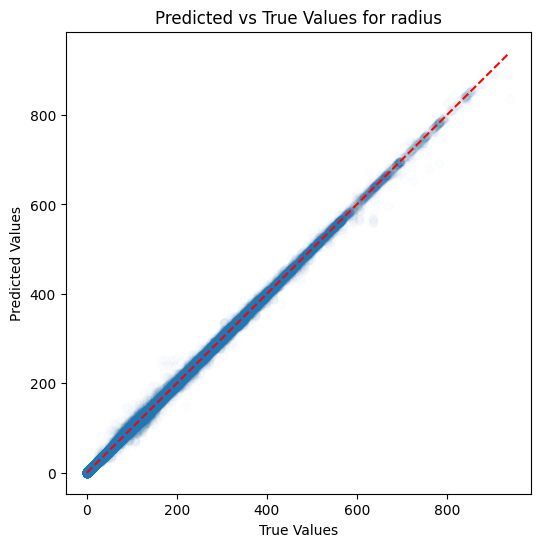

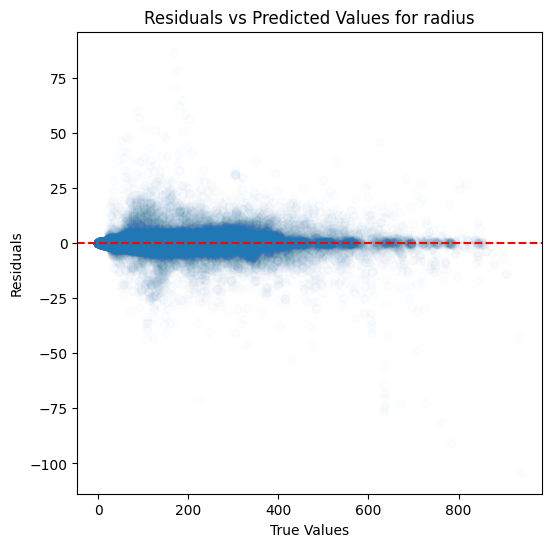

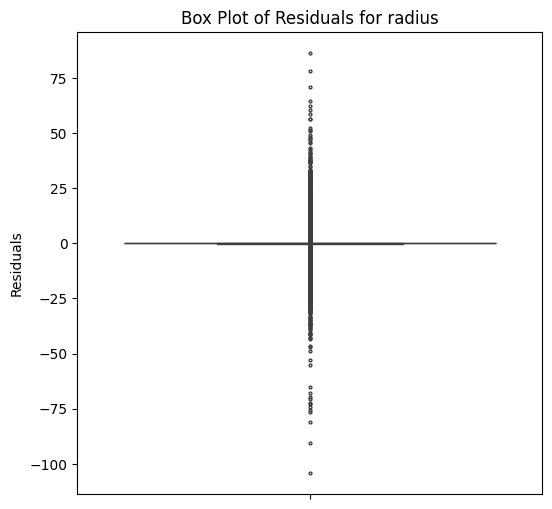

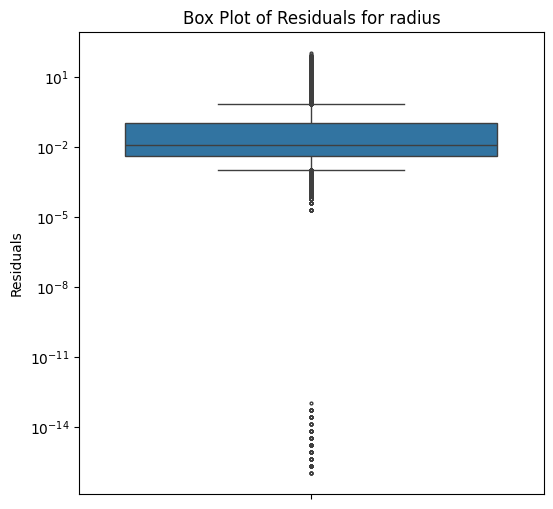

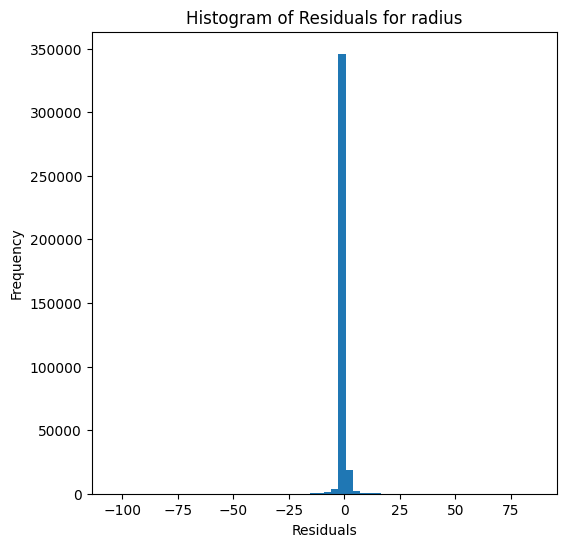

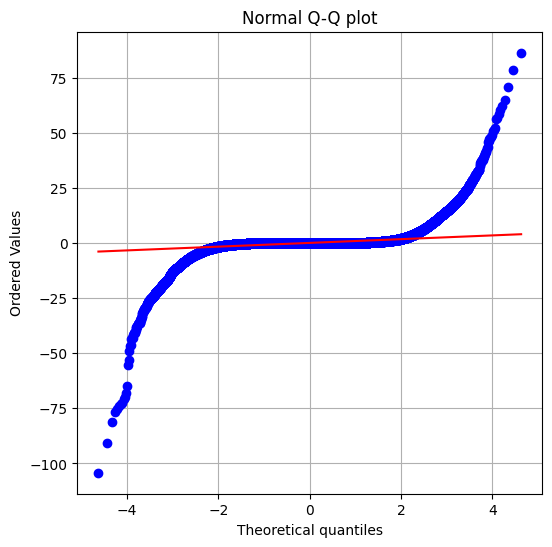

In [14]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [10]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


Base train data :
split 1 2 3 4 5 6 7 8 9 10 374715
0.0
2.0133200000000055

mass results:
RVE :  0.9997188056687223
RMSE :  0.04381247602675818
MAE :  0.010064404795434146
MedAE :  0.00010999999999761201
CORR :  0.999859798900955
MAX_ER :  2.0133200000000055
Percentiles : 
  75th percentile :  0.0022499999999974207
  90th percentile :  0.020780000000002463
  95th percentile :  0.05239999999999976
  99th percentile :  0.17560020000000007



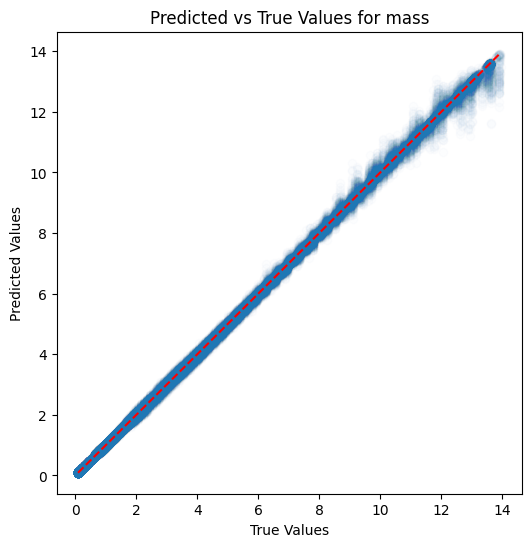

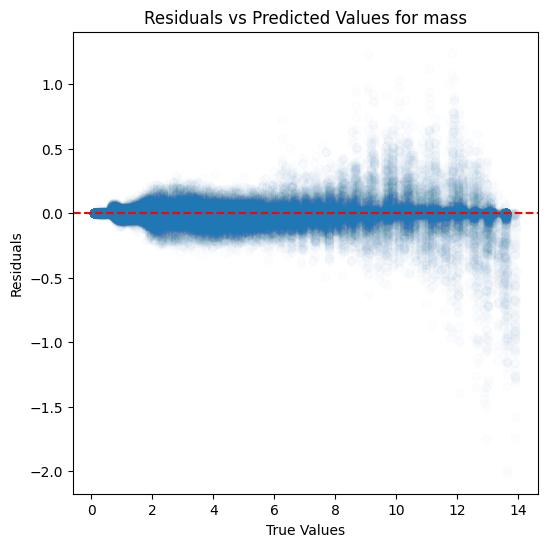

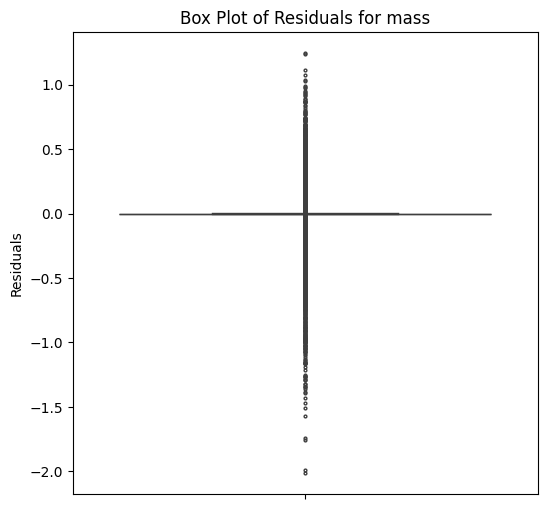

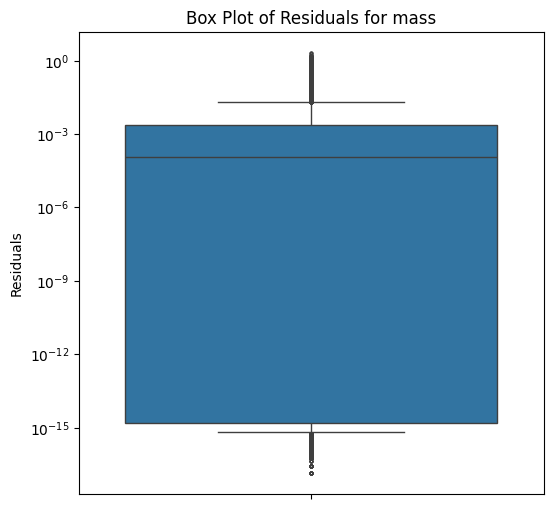

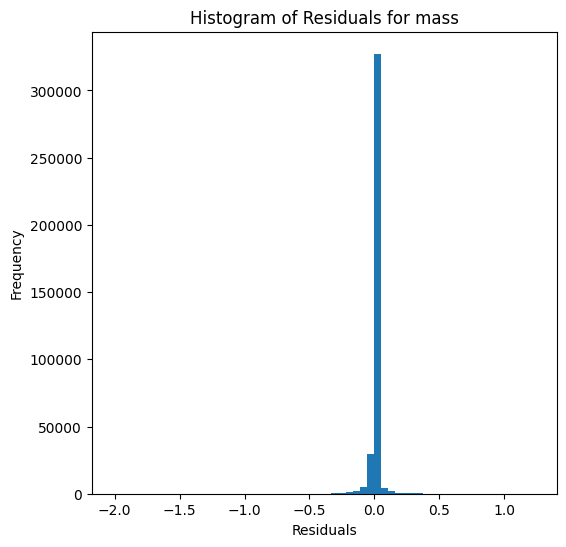

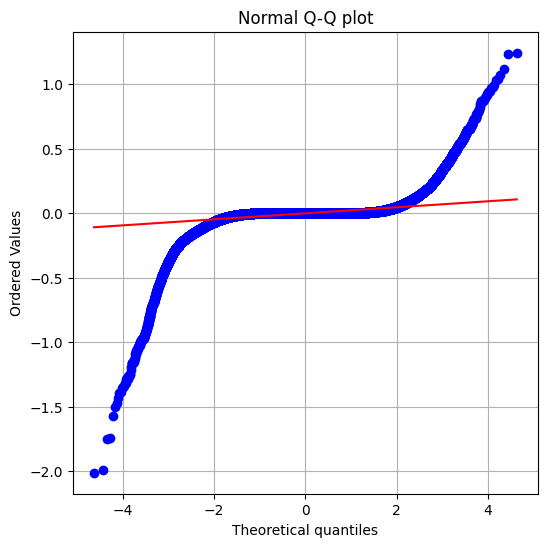

374715
0.0
98.77000000000021

radius results:
RVE :  0.999810223758309
RMSE :  1.1287188169001945
MAE :  0.1645998634757076
MedAE :  0.0031741666666675883
CORR :  0.9999051108628436
MAX_ER :  98.77000000000021
Percentiles : 
  75th percentile :  0.014650674603177372
  90th percentile :  0.14060000000000628
  95th percentile :  0.5450300000000292
  99th percentile :  3.5807199999999617



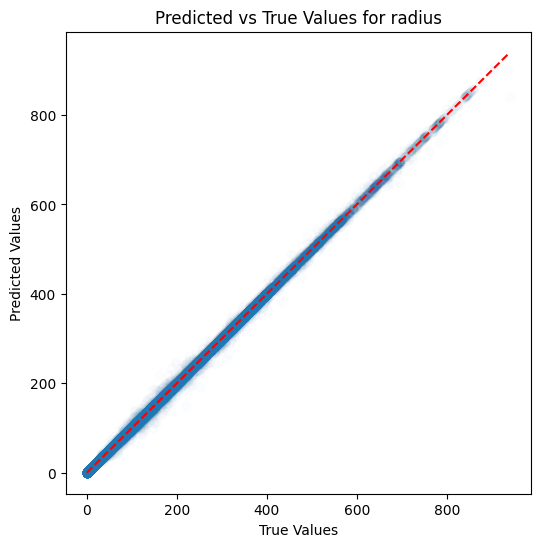

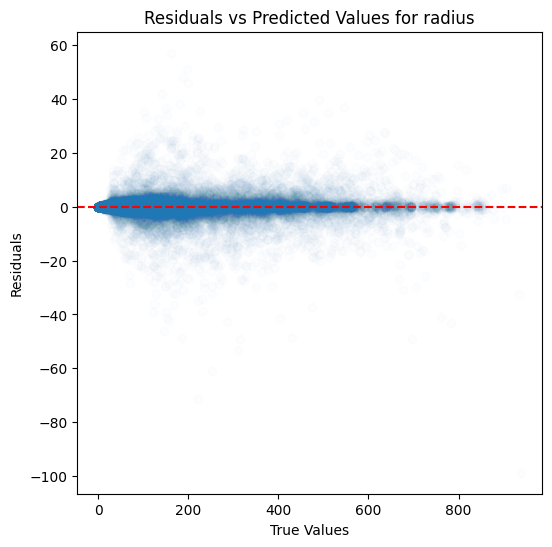

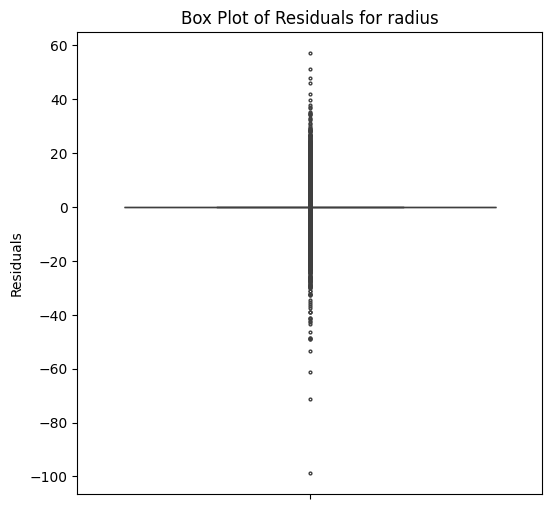

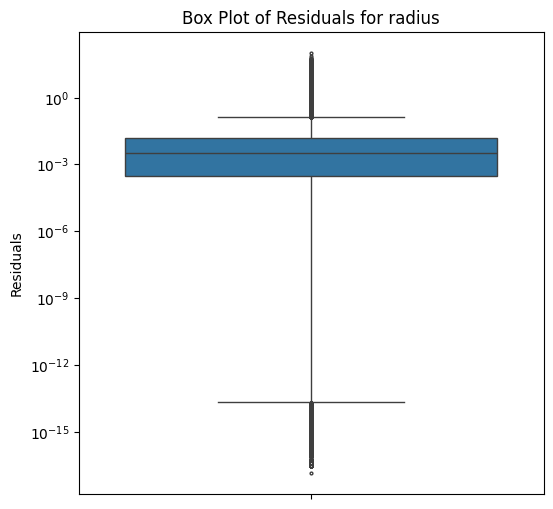

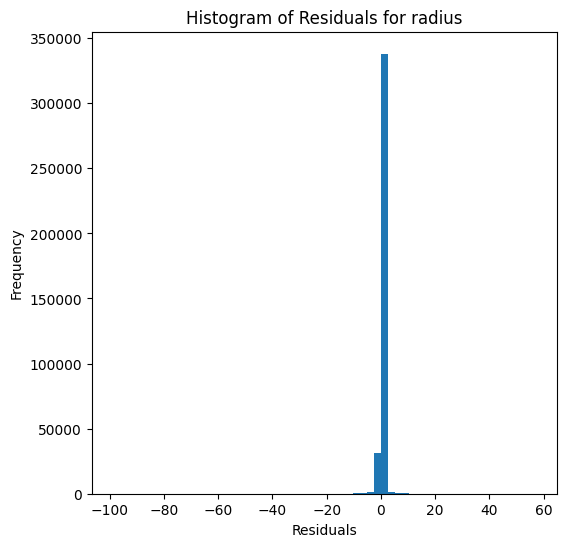

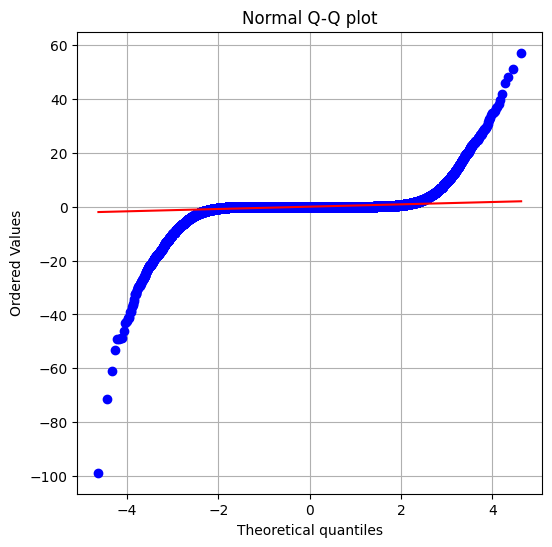

In [12]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [13]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


Base train data :
split 1 2 3 4 5 6 7 8 9 10 374715
1.5640258799187734e-07
1.2720146484374997

mass results:
RVE :  0.9996127313737168
RMSE :  0.05139110881397813
MAE :  0.022526314214272442
MedAE :  0.007530410766601658
CORR :  0.9998063491080552
MAX_ER :  1.2720146484374997
Percentiles : 
  75th percentile :  0.023344501495361047
  90th percentile :  0.056995812988281006
  95th percentile :  0.08872337036132813
  99th percentile :  0.21545288791656342



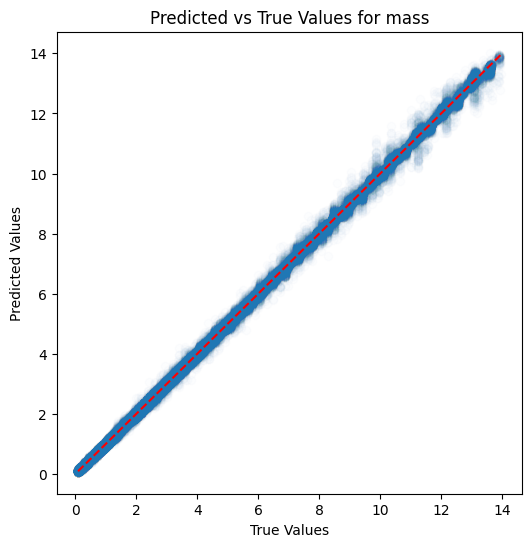

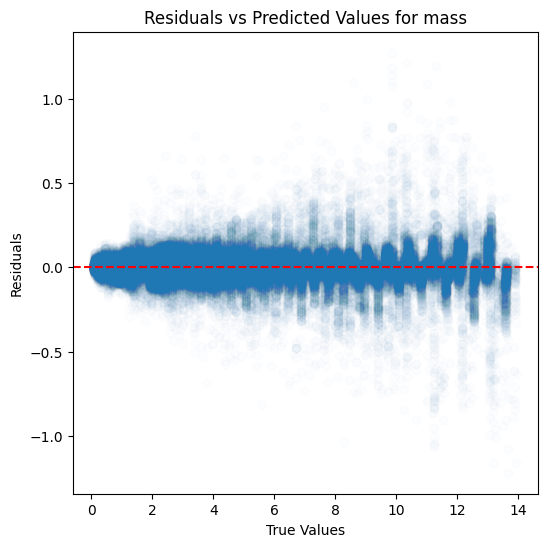

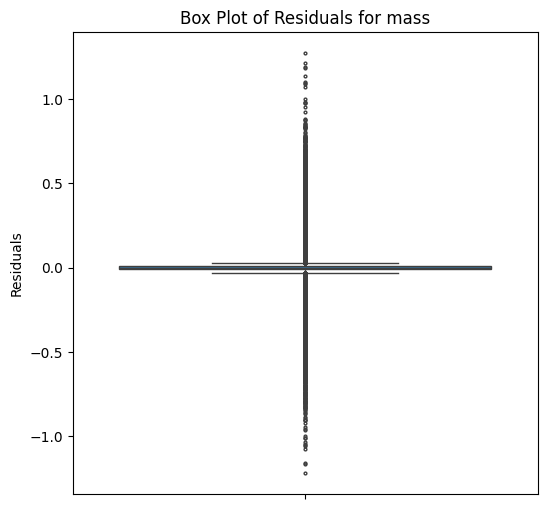

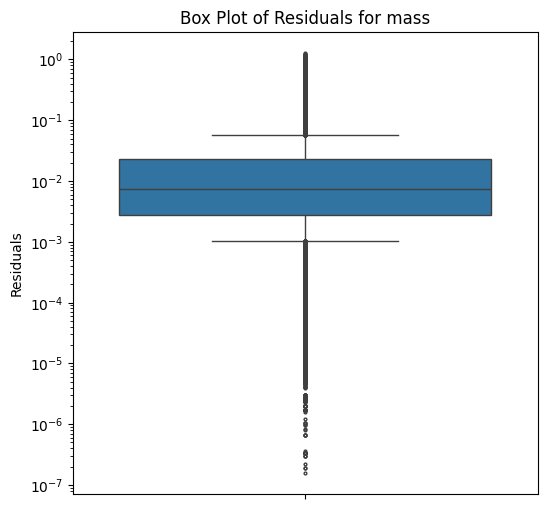

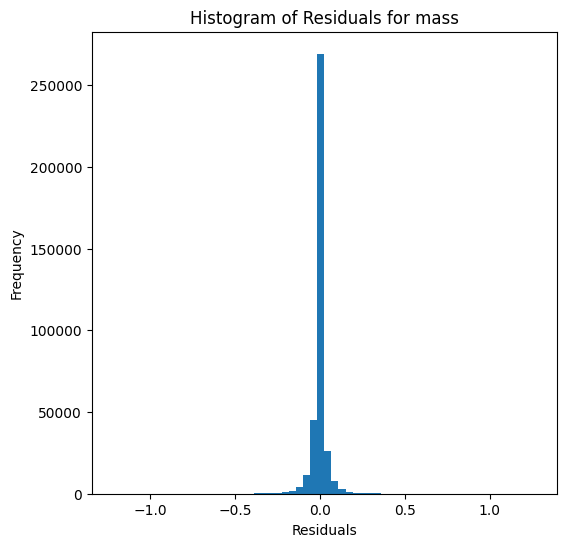

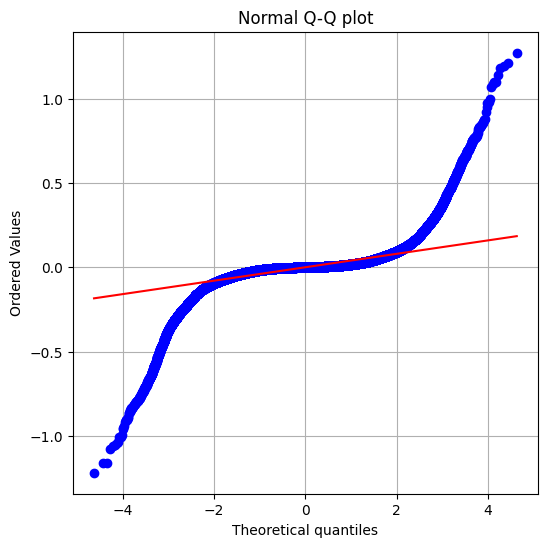

374715
1.0299682617898043e-06
138.54486083984375

radius results:
RVE :  0.9992773243997718
RMSE :  2.202542098261657
MAE :  0.655685062743413
MedAE :  0.1374403152465824
CORR :  0.999638600257252
MAX_ER :  138.54486083984375
Percentiles : 
  75th percentile :  0.3675636100769042
  90th percentile :  1.4291486053466809
  95th percentile :  2.929359436035141
  99th percentile :  9.196828308105436



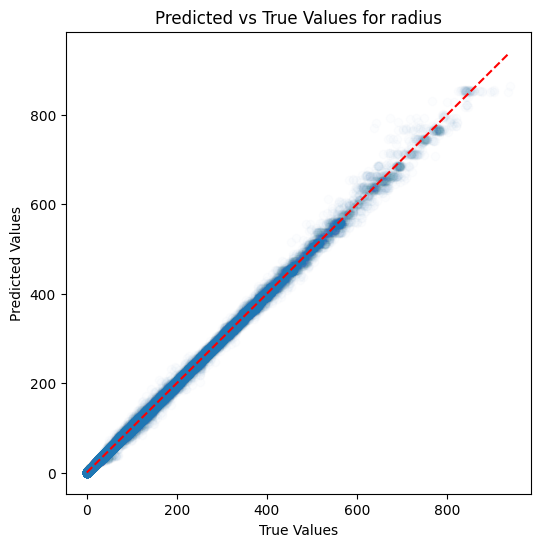

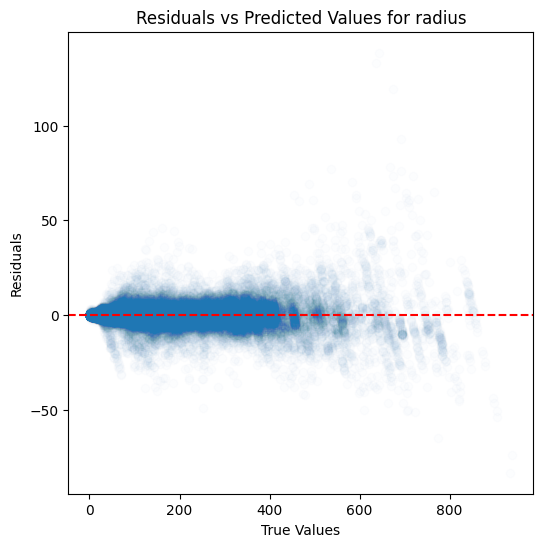

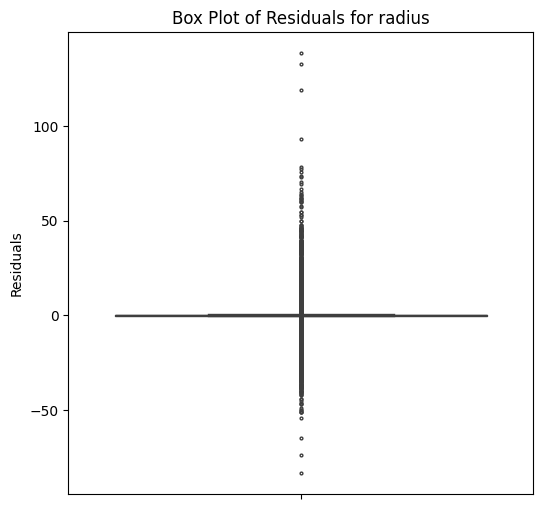

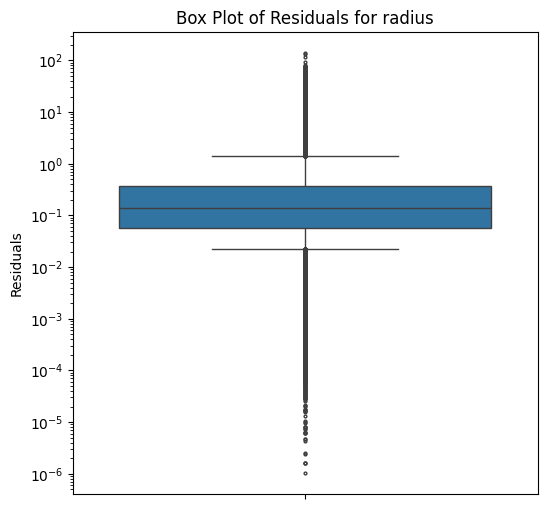

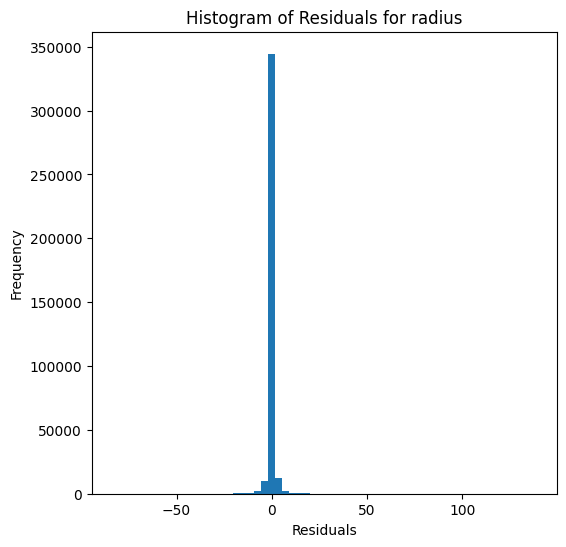

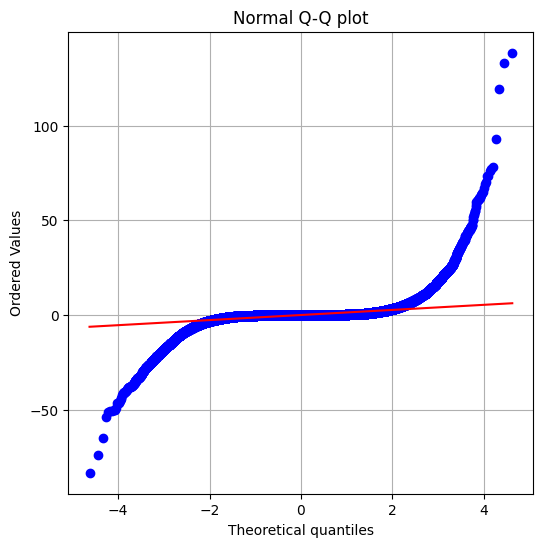

In [14]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [15]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


Base train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.537720000316567
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.5435462704678358
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.544055155856493
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.6475587449135252
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.6533450570950723
374715
1.9524203609400104e-06
4.411137857447157

mass results:
RVE :  0.9907100770238817
RMSE :  0.2548923854389184
MAE :  0.15753212209370757
MedAE :  0.09776198201279707
CORR :  0.995469582625677
MAX_ER :  4.411137857447157
Percentiles : 
  75th percentile :  0.1770266354966331
  90th percentile :  0.35312567210836504
  95th percentile :  0.5432934836686092
  99th percentile :  1.0130957070095774



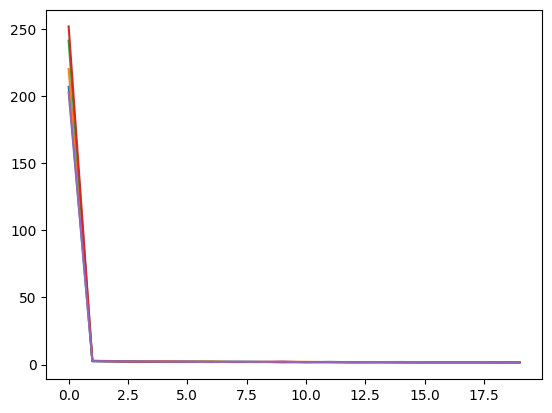

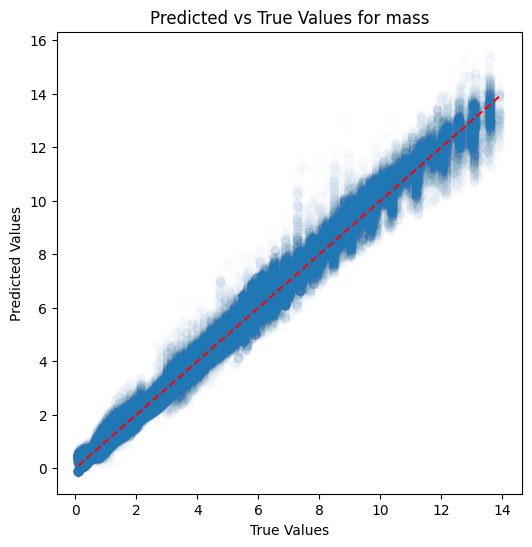

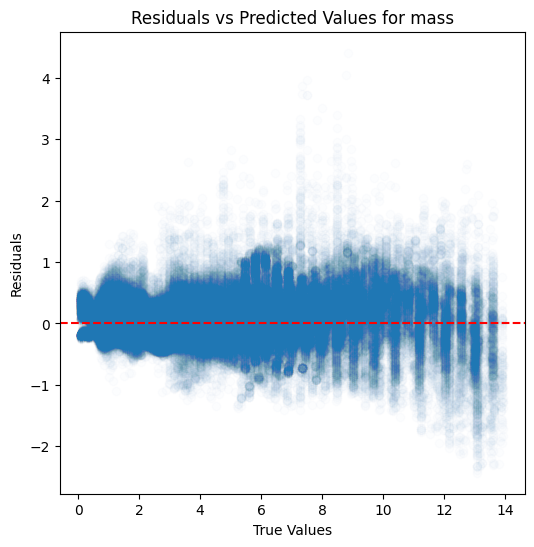

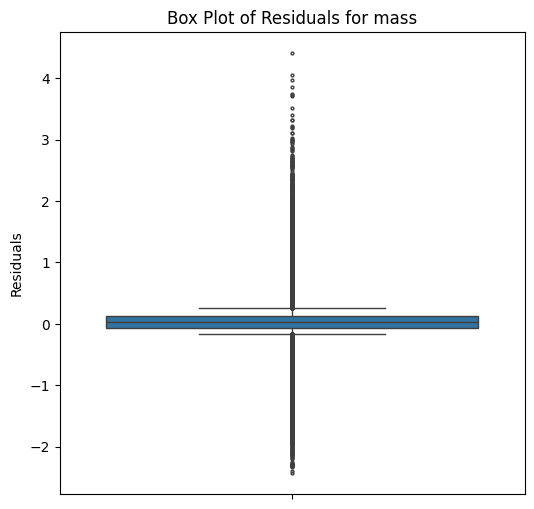

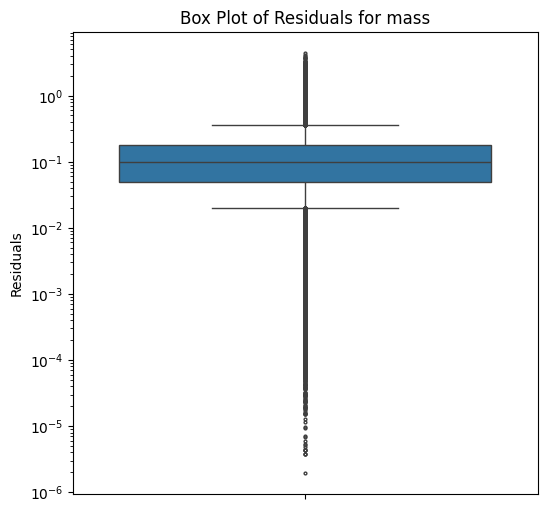

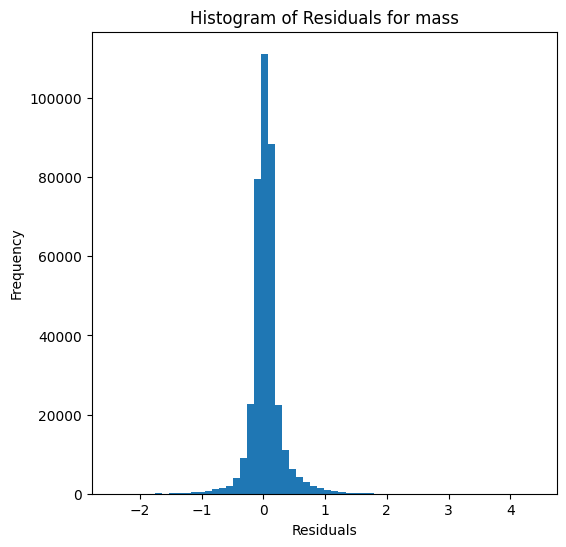

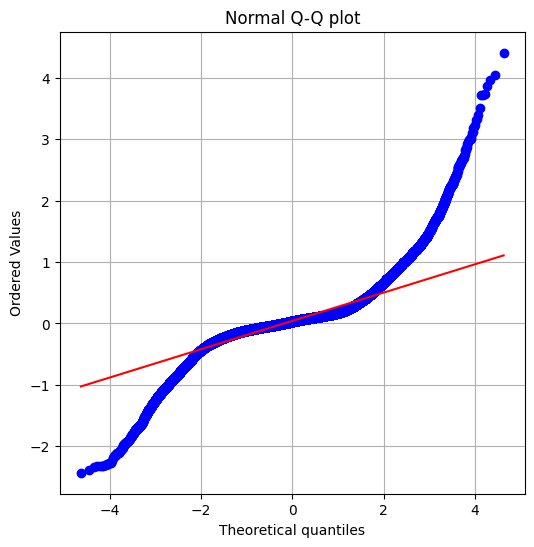

374715
1.6039377470633553e-07
70.87112252857514

radius results:
RVE :  0.9991009532112327
RMSE :  2.461355695032309
MAE :  0.7966819263178598
MedAE :  0.2691514046805832
CORR :  0.999563719729961
MAX_ER :  70.87112252857514
Percentiles : 
  75th percentile :  0.5390484103552424
  90th percentile :  1.515249108006097
  95th percentile :  2.9789799153464376
  99th percentile :  11.14082740484249



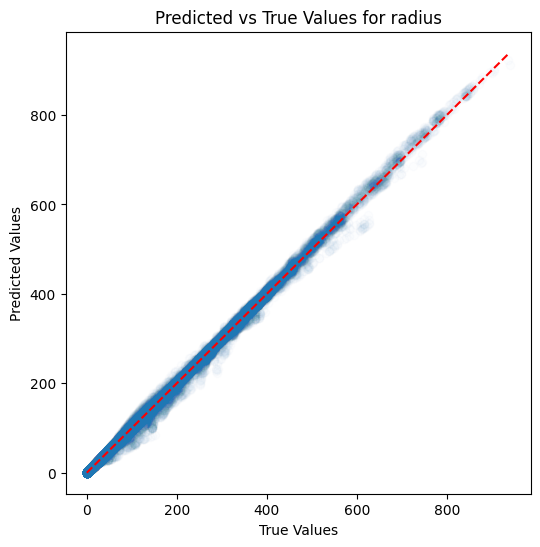

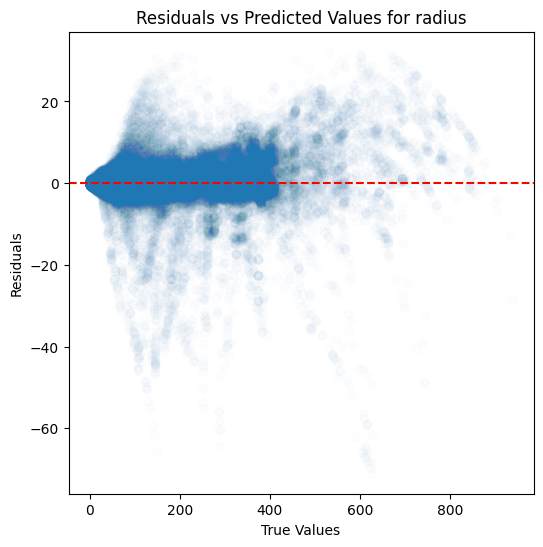

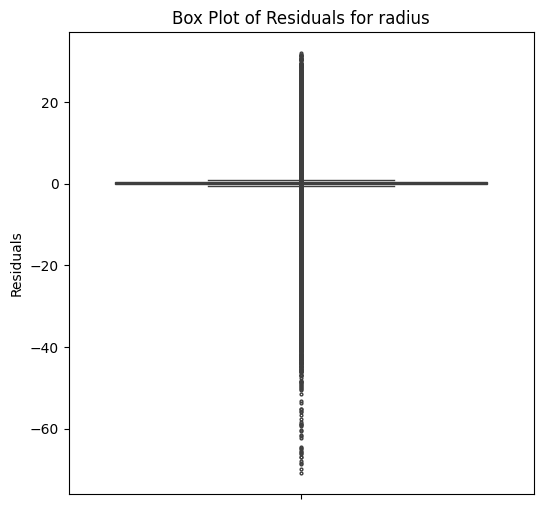

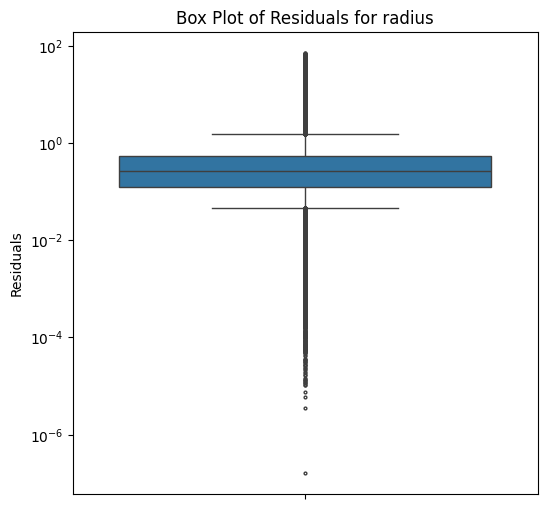

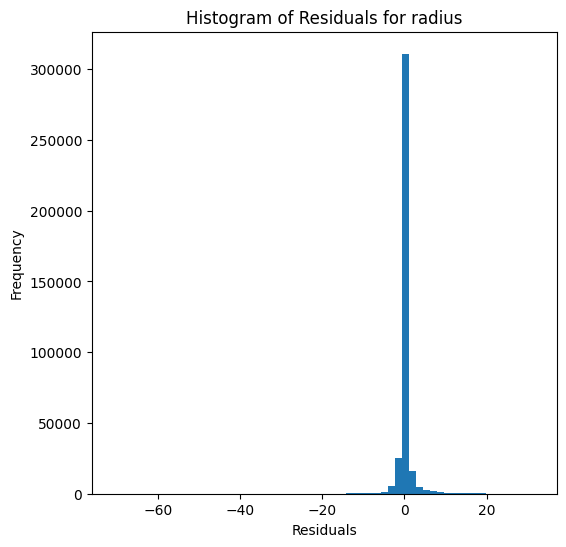

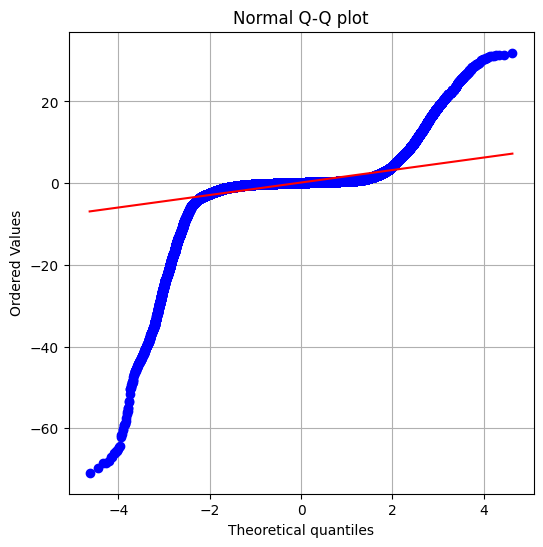

In [17]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)